In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt

import cv2
from scipy import ndimage

In [3]:
import pickle

with open('alldata.pkl', 'rb') as in_file:
    data = pickle.load(in_file)

In [4]:
biosensor = []
masks = []

for d in data:
    # biosensor.append(d['biosensor'])
    masks.append(d['mask'])

In [13]:
test_mask = masks[35]

# Nincs annyi sejt a maszkon ahány számmal jelöltük
print(np.unique(test_mask))
np.unique(test_mask).shape

[  0  19  20  21  22  23  24  25  30  32  33  34  35  36  37  38  40  41
  42  43  44  45  47  51  52  54  55  56  57  58  60  61  62  63  64  65
  66  68  69  77  78  79  80  81  82  83  84  85  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 104 107 108 109 110 112 113 114
 115 117 118 119 120 121 122 123 124 125 126 128 129 130 131 132 133 134
 135 136 137 138 139 141 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 215 216 217 218 219 220 221 222 223 224 225 226 227 229 230 231 232
 233 235 236 238 239 241 242 243 244 245 246 247 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 278 279 282 283
 286 287 288 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 307 308 309 310 311 312 315 317 318 319 320 322 323 324 325 326 327 328
 329 330 332 333 334 335 336 337 338 339 340 341]


(228,)

In [14]:
labeled_mask, num_cells = ndimage.label(test_mask)  # Label each cell
centers = ndimage.center_of_mass(test_mask, labeled_mask, range(1, num_cells+1))
# centers = np.round(centers).astype(int)  # Round to nearest integer
print(num_cells)

223


In [15]:
mask = test_mask.astype(np.uint8)  # Convert to 8-bit unsigned integer
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
# centroids = np.round(centroids[1:]).astype(int)  # Round to nearest integer, skip background
print(num_labels)

222


In [16]:
# Ez minden egyedi sejtet külön számol de lassú

# Get unique cell numbers, excluding 0
cell_numbers = np.unique(test_mask)[1:]

# Calculate average row and column indices for each cell number
avg_indices = [np.mean(np.argwhere(test_mask == cell_num), axis=0) for cell_num in cell_numbers]

# Convert to list of tuples
cell_centers_raw = [tuple(indices) for indices in avg_indices]

print(len(cell_centers_raw))

227


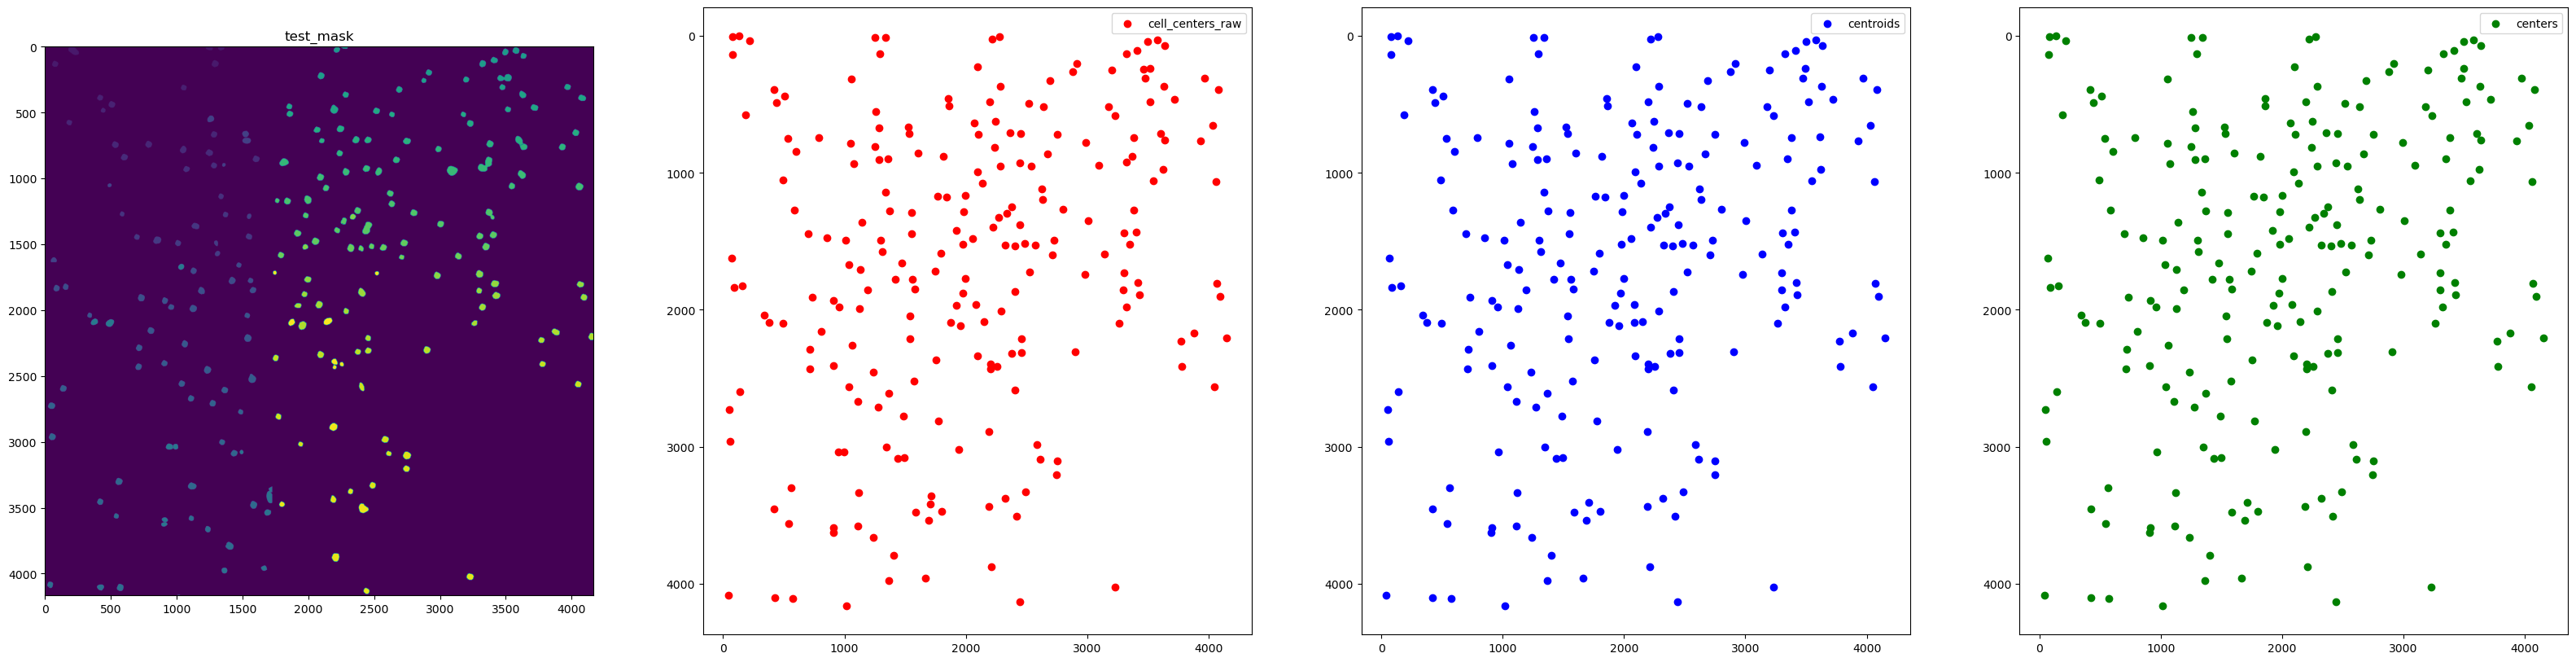

In [18]:
# Unpack the coordinates
cell_centers_raw_x, cell_centers_raw_y = zip(*cell_centers_raw)
centroids_x, centroids_y = zip(*centroids)
centers_x, centers_y = zip(*centers)

fig, axs = plt.subplots(1, 4, figsize=(40, 10))

# Plot the test_mask
axs[0].imshow(test_mask)
axs[0].set_title('test_mask')

# Raw np calculation
axs[1].scatter(cell_centers_raw_y, cell_centers_raw_x, c='red', label='cell_centers_raw')
axs[1].invert_yaxis()
axs[1].legend()

# CV
axs[2].scatter(centroids_x, centroids_y, c='blue', label='centroids')
axs[2].invert_yaxis()  # Invert the y-axis
axs[2].legend()

# ndimage
axs[3].scatter(centers_y, centers_x, c='green', label='centers')
axs[3].invert_yaxis()
axs[3].legend()

plt.show()

In [101]:
# A maszkokon meg kell keresni az összes sejt középpontját, és azok kooordinátáit kell eltárolni
centers_ndimage = []
centers_cv = []

# Assuming masks is a list of 2D numpy arrays
for mask in masks:
    labeled_mask, num_cells = ndimage.label(mask)  # Label each cell
    centers = ndimage.center_of_mass(mask, labeled_mask, range(1, num_cells+1))
    centers = np.round(centers).astype(int)  # Round to nearest integer
    centers_ndimage.append(centers)  # Store the centers

    mask = mask.astype(np.uint8)  # Convert to 8-bit unsigned integer
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
    # centroids = np.round(centroids[1:]).astype(int)  # Round to nearest integer, skip background
    centers_cv.append(centroids)  # Print or store the centers

In [107]:
# Ez egyel kevesebb mert a 0-t is beleveszi
num_cells_unique = []
for mask in masks:
    num_cells_unique.append(np.unique(mask).shape[0])


In [103]:
found_cells_nd = []
found_cells_cv = []
for center in centers_ndimage:
    found_cells_nd.append(center.shape[0])
for center in centers_cv:
    found_cells_cv.append(center.shape[0])

In [108]:
for i in range(len(num_cells_unique)):
    print(num_cells_unique[i], found_cells_nd[i], found_cells_cv[i])

86 76 77
406 358 351
301 293 288
462 441 438
249 241 239
56 56 56
37 35 36
52 51 52
40 38 39
51 45 46
48 45 46
48 47 48
42 41 42
51 48 49
47 45 46
56 55 56
163 157 158
169 166 166
154 145 146
142 134 135
190 172 172
208 181 182
133 123 124
123 115 116
207 202 202
200 196 195
140 139 140
158 157 158
204 199 200
245 240 241
218 215 214
208 203 203
160 157 157
222 218 218
228 222 223
228 223 222
220 213 213
222 219 219
243 238 238
263 260 258
78 77 78
81 77 78
97 96 97
93 91 92
87 85 86
82 80 81
53 52 53
69 68 69
46 45 46
54 53 54
60 57 58
52 51 52
77 76 77
100 99 100
86 83 84
81 80 81
94 91 92
82 81 81
48 47 48
34 33 34
51 50 51
39 39 40
44 43 44
44 43 44
60 58 59
36 36 35
65 64 65
34 32 32
107 104 105
24 23 24
64 63 64
23 22 23
35 34 35
30 28 29
61 60 61
182 180 181
119 116 117
173 170 171
62 61 62
209 207 208
110 109 110
184 179 180
54 53 54
217 214 214
166 163 164
139 138 139
70 68 69
141 138 139
66 64 65
140 139 140
201 197 198
84 82 83
98 96 96
43 42 43
139 137 137
78 75 76
78 77 78